# 1:  setting up
Luckily for us as programmers and data scientists we don't have to write all our code from scratch.
There are a lot of code libraries and modules available for many of the common tasks we will need to carry out.
The first step, before we start looking at data is to load some of these modules so that we can call on them in our code.The modules we are going to import are:

- pandas: a popular general-purpose data analysis library which allows importing data from various file formats. It also provides useful data structures which can be used to examine and edit data

- numpy: a popular library for performing mathematical operations, particularly with matrices and arrays.

- matplotlib: a library for plotting charts and other visualisations.

- Seaborn: a library which uses matplotlib and provides extra functions for visualising statistical analysis results.

- toolbox_module: this contains some python functions we wrote to perform complex tasks which need very long blocks of code.
importing them means we don't have to write them in this notebook, making it easier for you to read. As you progress with
python you will do this a lot with your own code.

You will need to run the code in the next cell so that al the code that relies on these libraries can work.

In [1]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import toolbox_module as tools

# 2: Loading the Data
Now we are going to import the data set. It is in a .csv file in a folder called 'data' the same directory as this notebook.
We are making a variable called 'df'. We also have access to a variable 'pd' which we created in the previous cell when
we imported _pandas._ We are calling a function in pandas (pd) called 'read()' which uses the location of the data as a string argument to load a
dataset into a pandas _dataframe_ (think of this as a table)

In [2]:
# load the dataset
df = pd.read_csv("data/diabetic_data.csv")

# Exploring the data
Now we have our data in a dataframe we can start examining and manipulating it.
Now let's explore the data. The first command we will use is in the cell below: `df.shape` this will return two values
in parentheses (in Python we call this a _tuple_). The first value is the number of rows in our dataset; the second is the
number of columns.

In [26]:
df.shape

(98053, 51)

### In your Notebook...
1. How many rows of data are in this dataset?
2. Could you open this data easily in Excel?

The next command we will try is `.head()` By default this will display the first 5 lines of data. It is useful for
giving a general idea of what the data looks like. If you put a number in the brackets it will return that amount of data

### try...
Type a number into the brackets and re-run the cell (if you tried to be a clever-clogs and typed 1000 like I would have
done ;-) you can get rid of it by re-running the cell with a smaller number

In [4]:
# type your code below
df.head(100)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1195056,79549353,Caucasian,Male,[70-80),?,2,1,2,1,...,No,Steady,No,No,No,No,No,No,Yes,>30
96,1195548,106343838,Caucasian,Female,[70-80),?,1,3,7,5,...,No,Steady,No,No,No,No,No,No,Yes,>30
97,1212006,84981816,Caucasian,Male,[70-80),?,1,1,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,NO
98,1257282,84488562,Other,Female,[50-60),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO


#we could put the stacktrace bit in the getting started section....


If everything went OK you should see the first 5 rows of data. If not you will see a lot of red text called a _stack trace_.
Don't worry about this. It might look alarming but it often includes helpful 	7	2	11	...	No	No	No	No	No	No	No	No	Yes	NO
3	500364	82442376	Caucasian	Male	[30-40)	1	1	information about where you went wrong.
If you do see a stack trace, make sure your code inthe cell above looks like this `df.head()` onece it does, and you
re-run the cell the stacktrace will be gone.
### try
replace `df.head()` with `df.hea()`
### in your Notebook
What did the output look like?
How might that help you work out what went wrong?

now put df.head() back into the cell and re-run it.

The dataset should have 101766 rows, and 50 columns. That's a lot of data to make sense of, but we have the tools!
Let's see what types of data we have. The command to do this is `df.dtypes` try it in the cell below.

In [5]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

Next to each column you can see the type of data it is. for example _int64_ is an integer. When Pandas isn't sure what
the type should be it uses 'object'. These are mostly strings as this is data coming from a .CSV file.
Now we know what our data looks like lets make sure it is in a suitable state for us to analyse. One of the first things
to do is deal with any missing values.

In this dataset, missing values are represented by a  “?”  So if we search every column which has a type of “object” to
see if there are any “?” values, and then count them, we can see the extent of our missing data problem, if any.


In [6]:
# note to self - do we need to take them through series and referencing pandas dataframes ? Or can we just explain what it does

# for every column in the dataframe
for col in df.columns:
    # check if it has a datatype of 'object' - if it does
    if df[col].dtype == object:
        #print the column name and the count of the number of '?' values
         print(col,df[col][df[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


We know that 'Gender' is encoded differently with 'Unknown/Invalid' used to signify missing data.
so:

In [7]:
tools.count_value(df, 'Unknown/Invalid', 'gender')

gender 3


We can see that some columns have quite a few missing values. Weight is the worst affected with around 98% of
the values missing. There is not much we can do to improve this situation so we will remove this column from the dataset.
Payer code and medical specialty also have a lot of missing values so we will also drop these columns. 2 other variables
the drugs named <drug names> all have the same values and therefore do not add any information, so we will also drop these

In [8]:
# dropping columns with large number of missing values
df = df.drop(['weight','payer_code','medical_specialty'], axis = 1)

the columns race, diagonal…, And gender all have some missing values but far fewer than the columns we have just dropped.
In this situation, we can just go in and delete those values. We will do this with a function from our toolbox module.
Once we have done this we can rerun the code we used earlier to see what our dataset looks like now we have cleaned it
up a bit

In [9]:
tools.drop_values(df,'race','?')
tools.drop_values(df,'diag_1', '?')
tools.drop_values(df,'diag_2', '?')
tools.drop_values(df,'diag_3', '?')
tools.drop_values(df,'gender', '?')

In [10]:
tools.count_values(df,'?')
tools.count_value(df,'?', 'gender')

race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0
gender 0


## Feature Engineering
So we have cleaned up the data and now have a dataset free from missing values, but there are still some issues.
The dataset wasn't designed specifically with machine learning in mind and some of the variables need to be optimised

### Previous diagnoses
There are three columns in the dataframe: diag1, diag2 and diag3 which are references to previous diagnoses.
These use something called an IDC code to indicate what the diagnosis was.
There are several hundred distinct values which are strings, mostly numeric.
we can simplify this into something our model can make sense out of by categorising them. In another study, researchers
used 9 desease categories and we have done the same assigning each a single digit identifier:
circulatory = 1, respiratory = 2,digestive = 3,diabetes = 4,injury = 5,musculoskeletal = 6,
genitourinary = 7, neoplasm = 8 and other = 9

We have provided a function in the toolbox_module which does this for you: `convert_idc_disease_class()`
This accepts a string and returns an integer between 1 and 9.
#### try...
patient x has a diag_1 code of '648'. what type of condition did they suffer from?

In [11]:
#write your code below...
tools.convert_idc_disease_class('648') #todo: delete me

7

The three lines of code in the cell below apply this function to every row in the dataframe and put the reult in a new
column. This uses a feature you will come across in many programming languages, called a _lambda function_. It works by
passing a bit of code as an argument to a function. The code then runs inside the function and enhances it.

You can see the Keyword `Lambda` and `row`followed by a colon. `row` is a parameter for the dataframe's `apply` function.
After the colon we pass our toolbox function which is applied to every row in the dataframe.

In [12]:
df['diag_1_cat']=df.apply(lambda row:tools.convert_idc_disease_class(row['diag_1']), axis=1)
df['diag_2_cat']=df.apply(lambda row:tools.convert_idc_disease_class(row['diag_2']), axis=1)
df['diag_3_cat']=df.apply(lambda row:tools.convert_idc_disease_class(row['diag_3']), axis=1)

Now lets run df head again. Can you see what's changed?

In [13]:
df.head(100).T
#tools.count_value(df,'AfricanAmerican','race')
#tools.count_value(df,'Caucasian','race')
#tools.count_value(df,'Female','gender')
#tools.count_value(df,'Male','gender')

,1,2,3,4,5,6,7,8,9,10,...,98,100,101,102,103,104,105,106,107,108
encounter_id,149190,64410,500364,16680,35754,55842,63768,12522,15738,28236,...,1257282,1260312,1260894,1262736,1270524,1274802,1414158,1445010,1455252,1517730
patient_nbr,55629189,86047875,82442376,42519267,82637451,84259809,114882984,48330783,63555939,89869032,...,84488562,38688588,91530936,50253120,67897251,71003736,48925980,23807808,96440301,105882957
race,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,AfricanAmerican,...,Other,Caucasian,Caucasian,Caucasian,Caucasian,AfricanAmerican,Caucasian,Other,Caucasian,Caucasian
gender,Female,Female,Male,Male,Male,Male,Male,Female,Female,Female,...,Female,Male,Female,Female,Male,Female,Male,Female,Female,Male
age,[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100),[40-50),...,[50-60),[70-80),[60-70),[30-40),[60-70),[70-80),[80-90),[50-60),[80-90),[60-70)
admission_type_id,1,1,1,1,2,3,1,2,3,1,...,1,1,2,2,1,1,1,1,1,2
discharge_disposition_id,1,1,1,1,1,1,1,1,3,1,...,1,11,11,1,2,1,6,1,1,1
admission_source_id,7,7,7,7,2,2,7,4,4,7,...,7,7,2,4,7,7,7,7,7,2
time_in_hospital,3,2,2,1,3,4,5,13,12,9,...,2,9,7,3,1,3,2,9,3,1
num_lab_procedures,59,11,44,51,31,70,73,68,33,47,...,53,56,73,22,59,31,34,96,34,35


### Drug prescribing
There are 23 drugs which have been prescribed as part of diabetes treatment protocols and the dataset records whether
the prescription was increased, reduced, not prescribed, or continued without change.
Have a look at the `head()` output to see them.
We are aware of previous research which has found that changes to medication is associated with lower readmission rates,
so we are going to make a new variable - a _'feature'_ for our machine learning algorithm called numchange which
is the total number of changes to any medication. To do that we make a list of all the medications (keys), and then we
loop over this making a temporary column in the data frame for each key and then using a lambda function like we did
earlier. This creates a variable “X” which stores the value of the column, which we test: if it is equal to
'no' or 'steady', then the medication either has not been prescribed or dosage not changed in which case we assign 0.
If it has any other value, i.e. “up”, or “down” then the dosages either been increased or decreased, in which case we
assign one. Once we have done that we loop over the keys again, this time adding the value of the temporary column to
`numchange` column, and then finally we delete the temporary column. The last line of code outputs the number of different
values in the column


In [14]:
# set up the list of drugs - the columns we are using
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

##loop over the drug columns, and for every drug...
for col in keys:
    #... make a temporary column
    colname = str(col) + 'temp'
    #...then check for changes to medications: assign 1 to the temporary column if there were changes, otherwise 0
    df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)

#make a numchange column: we do this outside the loop, why?
df['numchange'] = 0

# now we loop over them again
for col in keys:
    #remake the name of the temporary column
    colname = str(col) + 'temp'

    # add the value to the numchange column
    df['numchange'] = df['numchange'] + df[colname]
    # delete the temorary column
    del df[colname]

#print out a list of all the 'numchange' values we have and how many
df['numchange'].value_counts()

0    71310
1    25350
2     1281
3      107
4        5
Name: numchange, dtype: int64

### in your notebook...
What percentage of people did not have changes to their medications?

## Encoding
The dataset uses strings for gender, race, diabetesMed, and medication change, and for each of the 23 drugs used. To use these values in our
model we are going to convert them into binary values, i.e. 1 and 0.


#### Medication Change
First, we will deal with medication change by replacing ‘Ch’ with 1 and ‘No’ with 0

In [15]:
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)

#### diabetesMed
...then we will change diabetesMed by replacing yes with 1 and no with 0. This is a convention in programming when
converting things into binary. Yes is generally represented by 1 and no generally by 0, a bit like a Boolean value,
where True is represented by 1 and false by 0.

In [16]:
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)

### try...
#### Gender
Now it is your turn. Let’s encode gender by encoding 'Male' with 1 and 'Female' with 0. You an co this in tha same way
as we did in the cells above Have a look at the dataset to make sure that you type male and female exactly as they are
in the dataset. Clue: both capitalised

In [17]:
# write your code below...
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)

#### Medications
The dataset contains 23 columns each for a different medication. Each medication feature indicates whether the drug was
prescribed and whether there was a change in dosage.As we have already created a variable that measures the amount of
changes in medication alongside the existence of another variable which indicates whether or not there was a change, we
don't really need this information, so we are going to recode these variables so that they just indicate whether or not this particular drug was prescribed. We are going to loop through the set of drug keys we created earlier. This time, for each drug, we will replace the values: 0 for ‘no’;1 4 steady, up, down

In [18]:
# we are using the list of keys from the cell we created them in earlier
for col in keys:
    df[col] = df[col].replace('No', 0)
    df[col] = df[col].replace('Steady', 1)
    df[col] = df[col].replace('Up', 1)
    df[col] = df[col].replace('Down', 1)

#### test results
We are also going to recode test results for the A1c test (we are data scientists and we have no idea what that is) and the maximum glucose serum test. We are going to encode 0 for a normal result and 1 for an abnormal result. Where no test was given we will use -99.
#### in your notebook...
Have a look at the code in the cell below, what are the abnormal values for each test?

In [19]:
df['A1Cresult'] = df['A1Cresult'].replace('>7', 1)
df['A1Cresult'] = df['A1Cresult'].replace('>8', 1)
df['A1Cresult'] = df['A1Cresult'].replace('Norm', 0)
df['A1Cresult'] = df['A1Cresult'].replace('None', -99)
df['max_glu_serum'] = df['max_glu_serum'].replace('>200', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('>300', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('Norm', 0)
df['max_glu_serum'] = df['max_glu_serum'].replace('None', -99)

### Age Groupings
The age variable is currently encoded in 10 year intervals: 10 year bands from 0 – 100. We are going to create a loop
which runs 10 times and replaces each band with an integer.

In [20]:
# code age intervals [0-10) - [90-100) from 1-10
for i in range(0,10):
    df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)
df['age'].value_counts()


8     25306
7     21809
9     16702
6     16697
5      9265
4      3548
10     2717
3      1478
2       466
1        65
Name: age, dtype: int64

Collapsing of Multiple Encounters for same patient
#blurb goes here
N.B. we might move this and try fixing this at the end - not fixing it viases the data in favour of people
with multiple admissions

In [21]:
df2 = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df2.shape


(68630, 51)

Encoding the outcome variable


In [22]:
df['readmitted'].value_counts()

NO     52338
>30    34649
<30    11066
Name: readmitted, dtype: int64

In [23]:
df['readmitted'] = df['readmitted'].replace('>30', 0)
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'] = df['readmitted'].replace('NO', 0)


### Visualisations
Another important step in a machine learning project is visual inspection of the data. We had a look at the output
from the `head()` command, but as humans we can only make sense of this one column at a time, so we can only use it to
inspect a tiny fraction of the data. We need other strategies to get a picture of what the whole dataset looks like,
so let’s build some charts…

Remember those imports we did at the start of this notebook? One of them was _Seaborn_ which is a statistical
visualisation library. We imported it as `sns`. This means we can `sns` it to produce charts by calling its functions.
The seaborne library is based on _matplotlib_ and uses many of its functions, so when we write code, we might call
functions from matplotlib (`plt`) as well as seaborne in the same chart.
Let's start with a nice simple one and plot age and readmission as a bar chart...

#### Age and Readmission
first, we create a fig variable by calling figure method from `plt` which is a quick way of setting the size of the graphic.
Any matplotlib or seaborne code we call now will operate on this fig variable until we make a new one.
Next we call `sns.countplot()` to create a simple bar chart counting the values of a categorical variable using a column
from the data frame as the first argument (`y=`) to measure on the x-axis, and then use the column supplied as the `hue` argument,
which groups and colours the bars along the y-axis according to a second categorical variable.
### try...
See if you can flip the chart around by changing the name of the first argument. Which looks better?

In [45]:
fig = plt.figure(figsize=(15,10))
chart = sns.countplot(y= df['age'], hue = df['readmitted'])
chart.set_title('Age of Patient VS. Readmission')

<Figure size 1080x720 with 0 Axes>

C:\Users\Bernard\anaconda3\envs\tasterDay\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of Readmission')

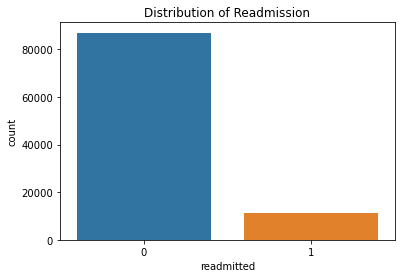

In [24]:
##


Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

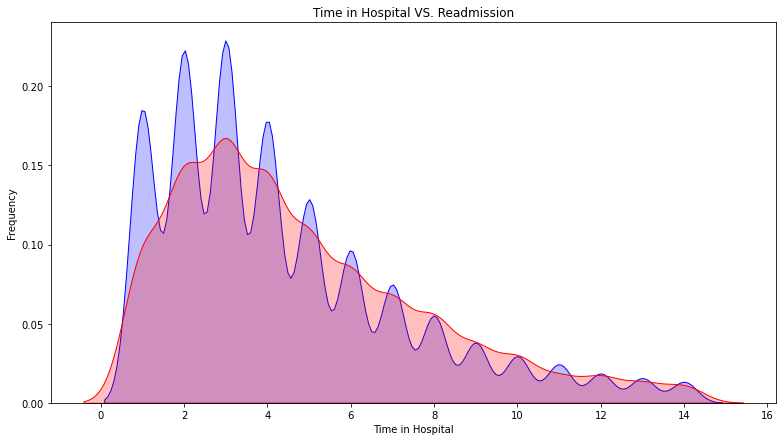

In [25]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')
